# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd

from joblib import dump

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
 # чтение файла с данными
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    data = pd.read_csv('C:/Users/Alexandra/datasets/users_behavior.csv')

In [3]:
#Выводим первые 10 строчек датафрейма data на экран
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
#Выводим основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


**Вывод:**

В датасете 3214 записи, 5 колонок. У четырех из них формат **float64**, у столбца **is_ultra**  - целочисленный тип данных.

### Предобработка данных

In [5]:
#Проверим дубликаты
data.duplicated().sum()

0

In [6]:
data.isna().sum() # Выводим количество пропущенных значений для каждого столбца.

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [7]:
data['messages'].unique() #уникальные значения messages содержат только целочисленные значения

array([ 83.,  56.,  86.,  81.,   1.,  21.,  20.,   6.,   3.,  38.,  13.,
        61.,  16.,   0.,   4.,  90.,  31.,  97.,  66.,  19.,  30.,  52.,
        48.,  44.,  27.,   7.,   9.,  43.,  33.,  34.,  10., 106.,  65.,
        17.,  11.,  29.,  75.,  47.,  49.,  64., 144.,  99.,  46.,  24.,
        22.,  55.,   8.,  93., 153.,  37.,  69.,  18.,  78.,  42.,  82.,
        62.,  40.,  57.,  60.,  58., 123.,  26.,  51., 109.,   5.,  39.,
        35.,  79.,  12., 182.,  36., 126.,  59., 102.,  14., 133., 110.,
        54.,  72., 103.,  23., 108.,  92.,  73.,  15.,  25.,  91., 113.,
       105.,  85., 191.,  32.,  50., 145.,  41., 150.,  53., 171., 176.,
        68.,  28.,  76.,  71., 118.,  63., 132.,  84.,   2.,  67., 111.,
       101.,  96., 112.,  95.,  89., 143.,  45.,  70.,  77.,  94., 137.,
       107.,  98., 141., 124., 129., 114.,  87.,  80., 117., 138., 142.,
       134., 128., 180., 115., 154.,  74., 185., 121., 127., 116.,  88.,
       140., 201., 100., 169., 155., 135., 151., 13

In [8]:
data['calls'].unique() #уникальные значения calls содержат только целочисленные значения

array([ 40.,  85.,  77., 106.,  66.,  58.,  57.,  15.,   7.,  90.,  82.,
        45.,  51.,  56., 108.,   6.,   2.,  26.,  79.,  49.,  93.,  48.,
        11.,  53.,  81., 154.,  37.,  50.,  41.,  10.,  71.,  65., 110.,
       120.,  76.,  64.,  23.,  34.,  98.,  35.,   5.,  70., 124., 129.,
        67.,   0.,  13.,  68.,  91., 121., 114., 125.,  80.,  33., 138.,
        84.,  78.,  69.,  63.,  72.,  73.,   1.,  43., 118.,  74.,  83.,
       141., 117.,  54., 101.,  29.,   3., 107.,  55.,  47., 158.,  87.,
        28.,  59.,  52.,  44.,  17., 111., 109.,  14.,  92.,  94.,  46.,
       133.,  75.,  38.,  60., 100.,  31.,  61.,  89.,  27., 196.,  24.,
        99.,  62., 162., 116., 123.,  18.,  21.,  12.,  86.,  32.,  95.,
        39.,  30.,  25.,  36.,  42., 113.,   9., 183., 156., 127.,  96.,
        16.,   4., 102.,  97.,  20., 104., 144.,  19., 132., 131., 136.,
        88., 115., 176., 160., 164., 169.,  22., 105., 152., 177., 161.,
       112.,   8., 126., 178., 103., 130., 198., 11

In [9]:
#Меняем тип значений в столбцах messages и calls на целочисленные
data['messages'] = data['messages'].astype(int)
data['calls'] = data['calls'].astype(int)

In [10]:
#Выводим первые 10 строчек датафрейма data на экран
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40,311.90,83,19915.42,0
1,85,516.75,56,22696.96,0
2,77,467.66,86,21060.45,0
3,106,745.53,81,8437.39,1
4,66,418.74,1,14502.75,0
5,58,344.56,21,15823.37,0
6,57,431.64,20,3738.90,1
7,15,132.40,6,21911.60,0
8,7,43.39,3,2538.67,1
9,90,665.41,38,17358.61,0


In [11]:
data['is_ultra'].unique() #уникальные значения is_ultra

array([0, 1])

**Вывод:**

Полных дубликатов и пропущенных значений нет. Тип данных в столбцах ***messages и calls*** изменен на целочисленные.


**Целевой признак** для нашего исследования - это столбец **is_ultra**. В этом столбце возможные значения **0** или **1**.  Стобец показывает, каким тарифом пользовался пользователь в течение месяца **(«Ультра» — 1, «Смарт» — 0)**.

Целевой признак - категоральный, значит, будем решать задачу классификации. 

Эта задача относится к классу **«обучение с учителем»**. Проверим корреляцию у признаков.

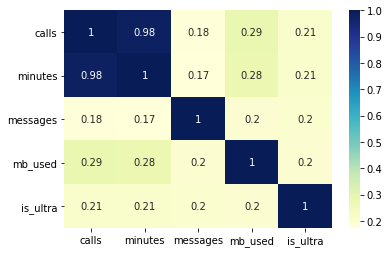

In [12]:
import seaborn as sns 

df_plot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 

**Вывод:**

Столбцы minutes и calls имеют высокую корреляцию (0.98). Calls — количество звонков,
minutes — суммарная длительность звонков в минутах. Чтобы избежать мультиколлениарности следует один из признаков удалить. Удалим calls.


In [13]:
data = data.drop(['calls'], axis=1)

## Разбейте данные на выборки

In [14]:
features = data.drop(['is_ultra'], axis=1) # извлекаем данные без целевого признака
target = data['is_ultra'] # извлекаем целевой признак

Разбиваем исходный датасет на 3 части: обучающую, валидационную и тестовую в соотношении **60% 20% 20%**.

In [15]:
# Выбираем параметр random_state
RANDOM_STATE = 5541123

### Выделяем обучающей выборке 60%

In [16]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=RANDOM_STATE)

In [17]:
# Проверяем размер обучающей выборки
print(features_train.shape)
print(target_train.shape)

(1928, 3)
(1928,)


### Выделяем валидационной и тестовой выборкам по 20%

In [18]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_test, target_test, test_size=0.5, random_state=RANDOM_STATE)

In [19]:
# Проверяем размер валидационной выборки
print(features_valid.shape)
print(target_valid.shape)

(643, 3)
(643,)


In [20]:
# Проверяем размер тестовой выборки
print(features_test.shape)
print(target_test.shape)

(643, 3)
(643,)


In [21]:
train, valid, test = np.split(data.sample(frac=1, random_state=821), [int(.6*len(data)), int(.8*len(data))])

## Исследуйте модели

Исследуем 3 изученные модели:
- дерево решений
- случайный лес
- логистическую регрессию

### Дерево решений

In [22]:
best_accuracy = 0
best_depth = 0
for depth in range(1, 40):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth) # инициализируйте модель DecisionTreeClassifier с параметром random_state=12345 и max_depth=depth
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # получите предсказания модели на валидационной выборке
      
    accuracy = accuracy_score(target_valid, predictions_valid)
    print('Точность',accuracy, 'Глубина дерева', depth)
    if accuracy > best_accuracy:
        best_depth = depth
        best_accuracy = accuracy
print('')
print("Лучшая точность", best_accuracy, "Глубина дерева:", best_depth)

Точность 0.744945567651633 Глубина дерева 1
Точность 0.7776049766718507 Глубина дерева 2
Точность 0.7978227060653188 Глубина дерева 3
Точность 0.7993779160186625 Глубина дерева 4
Точность 0.8055987558320373 Глубина дерева 5
Точность 0.807153965785381 Глубина дерева 6
Точность 0.8055987558320373 Глубина дерева 7
Точность 0.8087091757387247 Глубина дерева 8
Точность 0.7962674961119751 Глубина дерева 9
Точность 0.7947122861586314 Глубина дерева 10
Точность 0.7791601866251944 Глубина дерева 11
Точность 0.7636080870917574 Глубина дерева 12
Точность 0.7698289269051322 Глубина дерева 13
Точность 0.7682737169517885 Глубина дерева 14
Точность 0.7402799377916018 Глубина дерева 15
Точность 0.7433903576982893 Глубина дерева 16
Точность 0.7480559875583204 Глубина дерева 17
Точность 0.7309486780715396 Глубина дерева 18
Точность 0.7371695178849145 Глубина дерева 19
Точность 0.7231726283048211 Глубина дерева 20
Точность 0.7200622083981337 Глубина дерева 21
Точность 0.7200622083981337 Глубина дерева 22

### Случайный лес

In [23]:
best_accuracy = 0
best_est = 0
for est in range(1, 40):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est)
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # получите предсказания модели на валидационной выборке
      
    accuracy = accuracy_score(target_valid, predictions_valid)
    print('Точность',accuracy, 'Глубина дерева', est)
    if accuracy > best_accuracy:
        best_est = est
        best_accuracy = accuracy
print('')
print("Лучшая точность", best_accuracy, "Глубина дерева:", best_est)

Точность 0.7480559875583204 Глубина дерева 1
Точность 0.7729393468118196 Глубина дерева 2
Точность 0.7573872472783826 Глубина дерева 3
Точность 0.7729393468118196 Глубина дерева 4
Точность 0.7620528771384136 Глубина дерева 5
Точность 0.7744945567651633 Глубина дерева 6
Точность 0.776049766718507 Глубина дерева 7
Точность 0.7900466562986003 Глубина дерева 8
Точность 0.7900466562986003 Глубина дерева 9
Точность 0.7931570762052877 Глубина дерева 10
Точность 0.7962674961119751 Глубина дерева 11
Точность 0.8040435458786936 Глубина дерева 12
Точность 0.7884914463452566 Глубина дерева 13
Точность 0.7993779160186625 Глубина дерева 14
Точность 0.7900466562986003 Глубина дерева 15
Точность 0.7978227060653188 Глубина дерева 16
Точность 0.7916018662519441 Глубина дерева 17
Точность 0.7978227060653188 Глубина дерева 18
Точность 0.7900466562986003 Глубина дерева 19
Точность 0.8009331259720062 Глубина дерева 20
Точность 0.7931570762052877 Глубина дерева 21
Точность 0.7993779160186625 Глубина дерева 2

### Логистическая регрессия

In [24]:
best_max_iter = 0
best_accuracy = 0

for max_iter in range(100,300):
    model = LogisticRegression(random_state=RANDOM_STATE, solver='lbfgs', max_iter=max_iter) 
    model.fit(features_train, target_train)

    predictions_valid = model.predict(features_valid) # получите предсказания модели на валидационной выборке    
    accuracy = accuracy_score(target_valid, predictions_valid)
    
    if accuracy > best_accuracy:
        best_max_iter = max_iter
        best_accuracy = accuracy

        
print("Лучшая точность", best_accuracy, "Лучшее количество итераций:", best_max_iter)

Лучшая точность 0.7527216174183515 Лучшее количество итераций: 100


**Вывод:**

Исследование данных для обучения моделей показало, что наибольшую точность дала модель **Дерево решений**. Точность достигла **0.8087091757387247**

## Проверьте модель на тестовой выборке

### Дерево решений

In [25]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=best_depth)
model.fit(features_train, target_train)
accuracy = model.score(features_test, target_test)
print("Точность:", accuracy)

Точность: 0.7807153965785381


### Случайный лес

In [26]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=best_est)
model.fit(features_train, target_train)
accuracy = model.score(features_test, target_test)
print("Точность:", accuracy)

Точность: 0.7573872472783826


### Логистическая регрессия

In [27]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='lbfgs', max_iter=best_max_iter)
model.fit(features_train, target_train)
accuracy = model.score(features_test, target_test)
print("Точность:", accuracy)

Точность: 0.7511664074650077


**Вывод:**

Исследование тестовых данных показало, что наибольшую точность дала модель **Дерево решений**, как и в исследовании модели. Точность достигла **0.7807153965785381**

## (бонус) Проверьте модели на адекватность

Для оценки модели есть 3 метрики качества:

- accuracy - точность совпадения прогнозов с правильными ответами.
- Точность (англ. **precision**) показывает долю объектов, названных классификатором положительными и при этом действительно являющимися положительными
- Полнота (англ. **recall**) выявляет, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Проверим модель на адекватность с помощью <b>DummyClassifier

In [28]:
from sklearn.dummy import DummyClassifier

dmb = DummyClassifier(strategy="stratified" ,random_state=1515)
dmb.fit(features_train, target_train)
acc = dmb.score(features_test, target_test)
print("Качество прогноза DummyClassifier:", acc)
print("Качество нашего прогноза : 0.7807153965785381")

Качество прогноза DummyClassifier: 0.5738724727838258
Качество нашего прогноза : 0.7807153965785381


In [29]:
from sklearn.dummy import DummyClassifier

dmb = DummyClassifier(strategy="uniform" ,random_state=1515)
dmb.fit(features_train, target_train)
acc = dmb.score(features_test, target_test)
print("Качество прогноза DummyClassifier:", acc)
print("Качество нашего прогноза : 0.7807153965785381")

Качество прогноза DummyClassifier: 0.48989113530326595
Качество нашего прогноза : 0.7807153965785381


**Вывод:**

Прогноз нашей модели выше, чем прогноз, полученный DummyClassifier. Значит, модель адекватная.

### Дерево решений

In [30]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=best_depth)
model.fit(features_train, target_train)
test_predictions = model.predict(features_test)

accuracy = accuracy_score(target_test, test_predictions)
precision = precision_score(target_test, test_predictions)
recall = recall_score(target_test, test_predictions)

print('Accuracy =', accuracy, 'Precision =', precision, 'Recall =', recall)

Accuracy = 0.7807153965785381 Precision = 0.6875 Recall = 0.4656084656084656


### Случайный лес

In [31]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=best_est)
model.fit(features_train, target_train)
test_predictions = model.predict(features_test)

accuracy = accuracy_score(target_test, test_predictions)
precision = precision_score(target_test, test_predictions)
recall = recall_score(target_test, test_predictions)

print('Accuracy =', accuracy, 'Precision =', precision, 'Recall =', recall)

Accuracy = 0.7573872472783826 Precision = 0.5964912280701754 Recall = 0.5396825396825397


### Логистическая регрессия

In [32]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='lbfgs', max_iter=best_max_iter)
model.fit(features_train, target_train)
test_predictions = model.predict(features_test)

accuracy = accuracy_score(target_test, test_predictions)
precision = precision_score(target_test, test_predictions)
recall = recall_score(target_test, test_predictions)

print('Accuracy =', accuracy, 'Precision =', precision, 'Recall =', recall)

Accuracy = 0.7511664074650077 Precision = 0.7959183673469388 Recall = 0.20634920634920634


## Общий вывод

В ходе исследования данных были изменены форматы данных в столбцах **messages и calls** на целочисленные.

Была выявлена сильная зависимость между **calls и minutes**. Поэтому столбец **calls** удалили из исследования.

Был выявлен целевой признак **is_ultra**.

Выборка разделена на 3 части: обучающую, валидационную и тестовую в соотношении **60% 20% 20%**.

Исследование проводилось на моделях:
- дерево решений
- случайный лес
- логистическую регрессию
    

Было выявлено, что лучший результат дает модель **Дерево решений**. Точность достигла **0.8087091757387247**
Проверка на тестовых данных подтвердила этот результат. Точность на тестовых данных **0.7807153965785381**

Тестовые модели проверены на адекватность с помощью метрик **accuracy, precision, recall**. Дерево решений имеет наибольшую адекватность. **Accuracy = 0.7807153965785381 Precision = 0.6875 Recall = 0.4656084656084656**
       
Прогноз нашей модели выше, чем прогноз, полученный **DummyClassifier**. Значит, модель адекватная.
